In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_df = pd.read_csv('../Handwritten_Digit_Recognition/data/train.csv')
test_df = pd.read_csv('../Handwritten_Digit_Recognition/data/test.csv')


In [3]:
#Get the number of rows and columns:
print('Shape of Train Dataset',train_df.shape)
print('Shape of Test Dataset',test_df.shape)

Shape of Train Dataset (42000, 785)
Shape of Test Dataset (28000, 784)


In [10]:
def print_image(index):
    some_digit = train_df.iloc[index,1:].values
    some_digit_img = some_digit.reshape(28,28)
    plt.imshow(some_digit_img,'binary')
    return some_digit_img

In [31]:
train_df.iloc[1,1:].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  18,  30, 137, 137, 192,  86,  72,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  13,  86, 250, 254, 254, 254, 254, 217,
       246, 151,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16, 179, 254, 254, 254, 25

NameError: name 'some_digit' is not defined

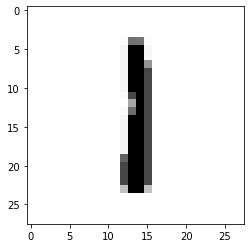

In [11]:
print_image(2)
print(some_digit)

### Checking First 10 Images

In [12]:
X = train_df.drop('label', axis=1)
print("Features shape: ", X.shape)
y = train_df.label
print("Target shape: ", y.shape)

Features shape:  (42000, 784)
Target shape:  (42000,)


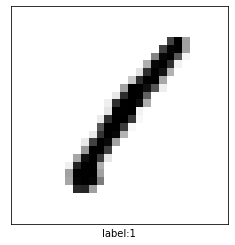

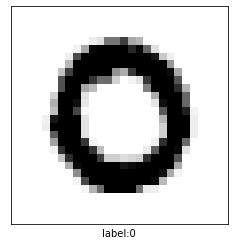

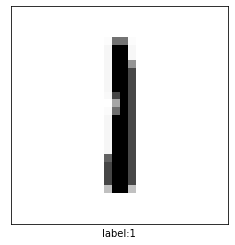

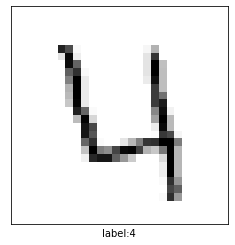

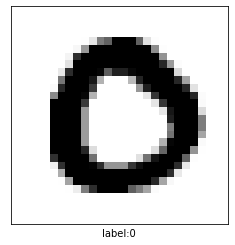

In [13]:
for i in range(5):
    #plt.subplot(5,4, i+1)
    plt.xticks([])
    plt.yticks([])
    print_image(i)
    plt.xlabel('label:{}'.format(y[i]))
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Reshape all DATA's to format 28x28 

In [15]:
X_train.shape

(33600, 784)

In [16]:
import numpy as np

IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE)
X_testr = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)

print('Training sample shape',X_trainr.shape)
print('Training sample shape',X_testr.shape)




Training sample shape (33600, 28, 28)
Training sample shape (8400, 28, 28)


In [17]:
X_trainr[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        253, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        254, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163,
        255, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167,
        251,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Resize image to make it suitable for convolutional

In [18]:
import numpy as np

IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_testr = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print('Training sample shape',X_trainr.shape)
print('Training sample shape',X_testr.shape)

Training sample shape (33600, 28, 28, 1)
Training sample shape (8400, 28, 28, 1)


### Data normalisation

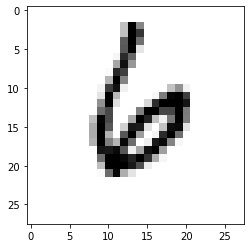

In [19]:
X_train = tf.keras.utils.normalize(X_trainr,axis=1)
X_test = tf.keras.utils.normalize(X_testr,axis=1)
plt.imshow(X_trainr[0],cmap=plt.cm.binary)

Convert classes to oneHot Vector

In [120]:
Y_train.shape

(33600,)

In [121]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [122]:
# print(Y_train.shape)
# print(Y_test.shape)

(33600, 10)
(8400, 10)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [56]:
# Create neural network

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [57]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [58]:
history = model.fit(X_train,Y_train,epochs=5,validation_split=0.3)

Epoch 1/5
735/735 [==============================] - 39s 51ms/step - loss: 0.4664 - accuracy: 0.8503 - val_loss: 0.1881 - val_accuracy: 0.9453
Epoch 2/5
735/735 [==============================] - 32s 43ms/step - loss: 0.1414 - accuracy: 0.9571 - val_loss: 0.1239 - val_accuracy: 0.9624
Epoch 3/5
735/735 [==============================] - 32s 44ms/step - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.1016 - val_accuracy: 0.9693
Epoch 4/5
735/735 [==============================] - 32s 43ms/step - loss: 0.0760 - accuracy: 0.9778 - val_loss: 0.0922 - val_accuracy: 0.9715
Epoch 5/5
735/735 [==============================] - 32s 44ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0960 - val_accuracy: 0.9712


In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


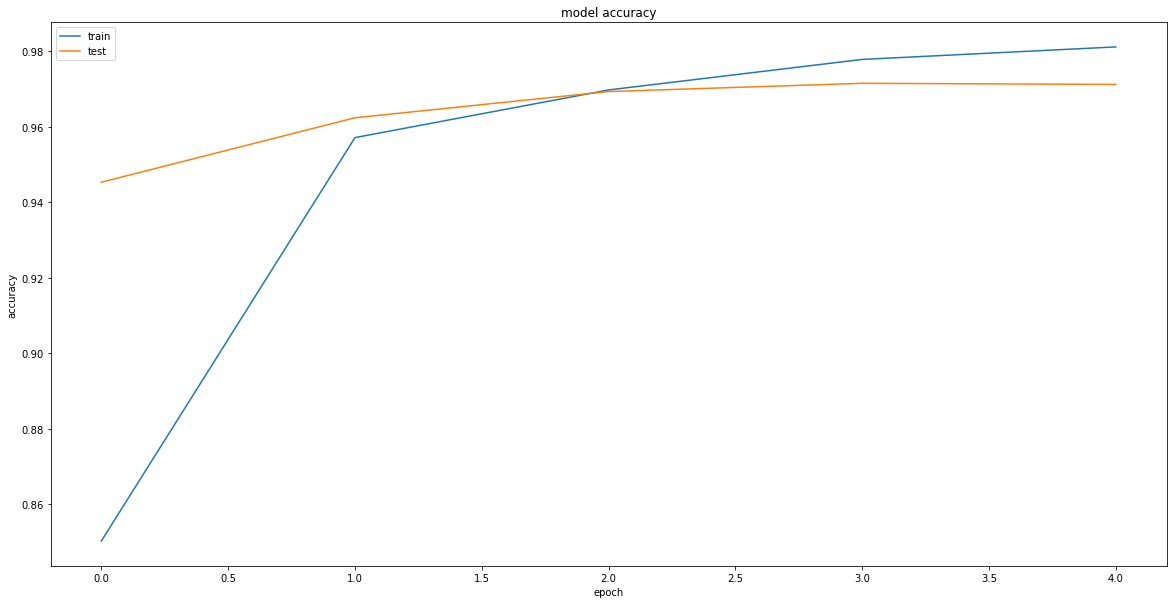

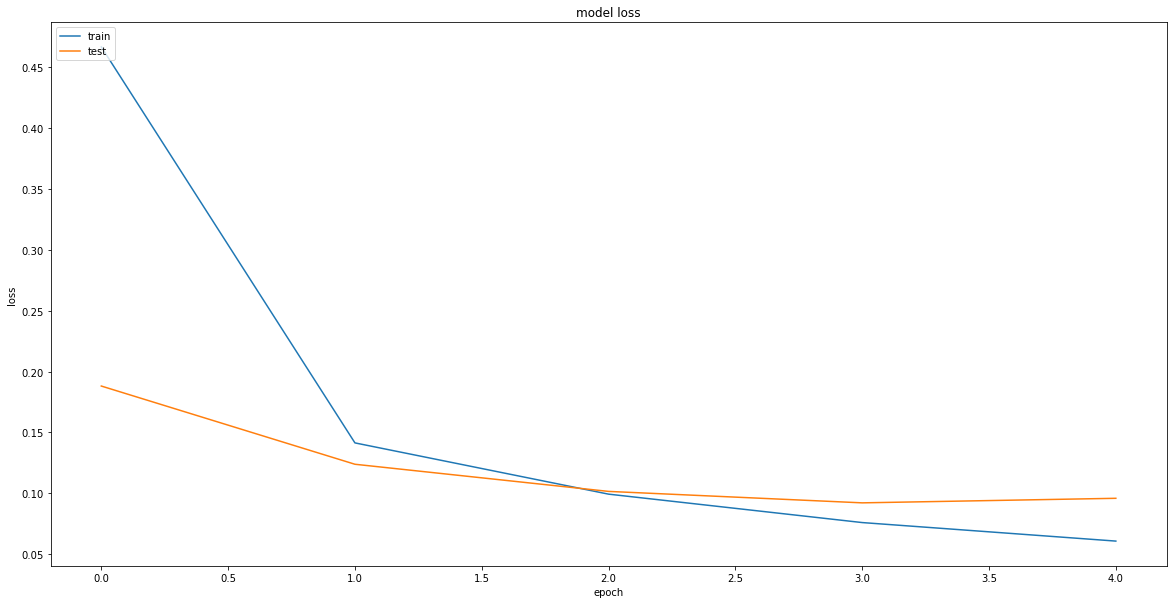

In [63]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [34]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print(test_loss)
print(test_acc)

263/263 [==============================] - 4s 15ms/step - loss: 0.0744 - accuracy: 0.9765
0.07443086057901382
0.9765475988388062


In [100]:
predictions = model.predict([X_test])

In [36]:
print(predictions)

[[2.8099035e-04 1.8321474e-05 1.8160235e-03 ... 8.8673325e-05
  9.9316335e-01 3.7408832e-03]
 [2.0970772e-05 9.9963760e-01 9.4241132e-06 ... 1.5754772e-04
  8.2226597e-07 3.1010029e-05]
 [4.3091796e-07 2.0293179e-05 2.2586983e-07 ... 1.7261865e-03
  2.9631055e-05 9.9717027e-01]
 ...
 [5.4043774e-08 5.6148369e-06 9.7104539e-06 ... 2.6367548e-05
  1.0324961e-05 1.4060714e-06]
 [9.9484456e-01 3.8677794e-07 9.4654042e-06 ... 1.6540562e-05
  8.9029292e-08 4.2015878e-03]
 [1.3377054e-07 3.3763769e-08 2.7997286e-08 ... 2.3814337e-05
  1.0299838e-05 9.9996269e-01]]


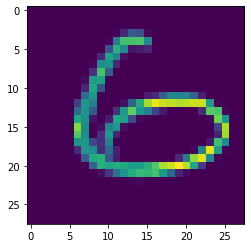

In [32]:
plt.imshow(X_test[10])


In [38]:
print(np.argmax(predictions[10]))

6


In [40]:
# pip install opencv_python
import cv2

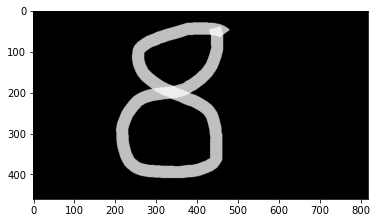

In [42]:
img = cv2.imread('../Handwritten_Digit_Recognition/img/eight.png')
plt.imshow(img)

In [44]:
img.shape

(460, 819, 3)

In [45]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [46]:
.shape

(460, 819)

In [48]:
resize = cv2.resize(gray, (28,28),interpolation=cv2.INTER_AREA)

In [49]:
resize.shape

(28, 28)

In [148]:
new_img = tf.keras.utils.normalize(resize,axis=1)
new_img = np.array(new_img).reshape(-1,IMG_SIZE,IMG_SIZE,1)
new_img.shape

(1, 28, 28, 1)

In [52]:
pred = model.predict(new_img)

In [166]:
pred.shape

(1, 10)

In [53]:
print(np.argmax(pred))

8


TypeError: 'builtin_function_or_method' object is not subscriptable

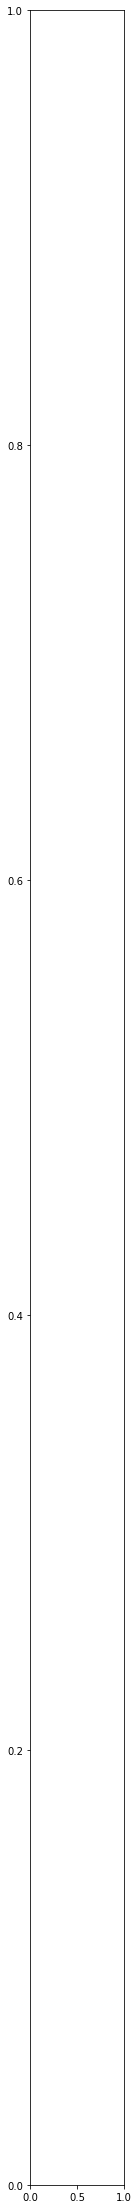

In [102]:
import matplotlib.pyplot as plt

def plt_face(new_img):
    h = 28
    w = 28
    plt.imshow(new_img.reshape((h, w)), cmap='bone')
    plt.xticks([])
    plt.yticks([])


# plt_face(X[0])
Xmean = np.mean(X,0)
Xs = X - Xmean[None,:]
U,S,Vtr = np.linalg.svd(Xs, full_matrices=False)


nplt = 20
plt.figure(figsize=(40, 40))
for i in range(nplt):
    plt.subplot(1,nplt,i+1)
    Vi = X_train.flatten[i]
    plt_face(X_train.flatten[i])
    plt.title('i={0:d}'.format(i))

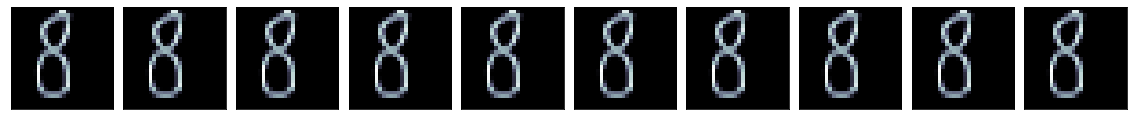

In [80]:
fig, axes = plt.subplots(1, 10, figsize=(20, 20),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(new_img.reshape(28, 28), cmap='bone')

In [131]:
new_img.shape

(1, 28, 28, 1)

(28, 28)


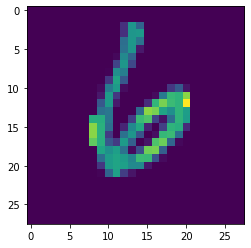

In [98]:

pixels = X_train[0].flatten().reshape(28,28)
print(pixels.shape)
plt.imshow(pixels)

In [97]:
pixels.shape

(28, 28)

In [229]:

# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output)

0 conv2d_3 KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 64), dtype=tf.float32, name=None), name='conv2d_3/BiasAdd:0', description="created by layer 'conv2d_3'")
3 conv2d_4 KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 64), dtype=tf.float32, name=None), name='conv2d_4/BiasAdd:0', description="created by layer 'conv2d_4'")
6 conv2d_5 KerasTensor(type_spec=TensorSpec(shape=(None, 3, 3, 64), dtype=tf.float32, name=None), name='conv2d_5/BiasAdd:0', description="created by layer 'conv2d_5'")


In [232]:
lay1 = model.layers[1].get_weights()

lay1

[]

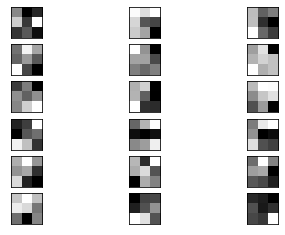

In [237]:
# # plot first few filters
n_filters, ix = 6, 1
# for i in range(n_filters):
# 	# get the filter
	f = filters[:, :, :, i]
# 	# plot each channel separately
for j in range(3):
    # specify subplot and turn of axis
    ax = pyplot.subplot(lay1, 3, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    pyplot.imshow([:, :, :, i], cmap='gray')
    ix += 1
# show the figure
pyplot.show()

conv2d_3 (3, 3, 64, 64)
64


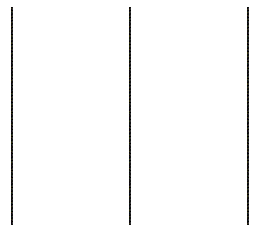

conv2d_4 (3, 3, 1, 64)
64


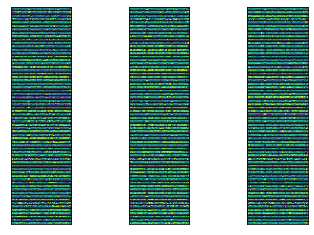

conv2d_5 (3, 3, 64, 64)
64


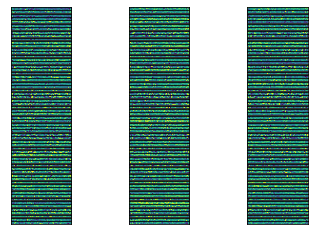

In [189]:
#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                # plt.figure(figsize=(30, 30))
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

OUTPUT KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='activation_11/Softmax:0', description="created by layer 'activation_11'")
(3, 28, 28, 1)
(3, 26, 26, 64)
(3, 13, 13, 64)
(3, 11, 11, 64)
(3, 11, 11, 64)
(3, 5, 5, 64)


<ipython-input-220-b2eb8f3ff42c>:48: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


(3, 3, 3, 64)
(3, 3, 3, 64)
(3, 1, 1, 64)
(3, 64)
(3, 64)
(3, 64)
(3, 32)
(3, 32)
(3, 10)
(3, 10)


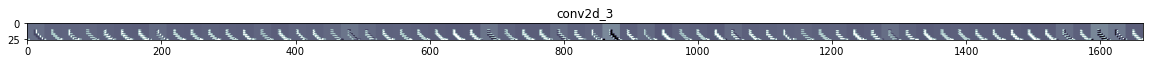

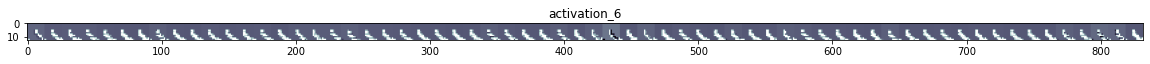

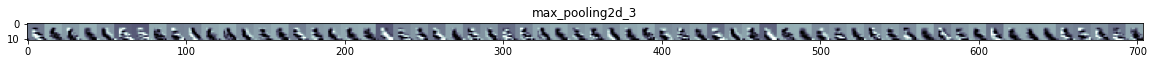

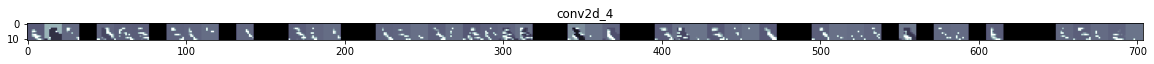

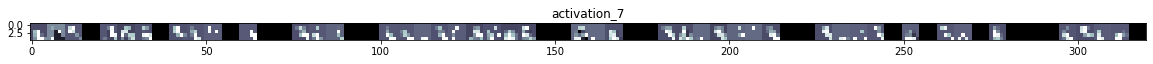

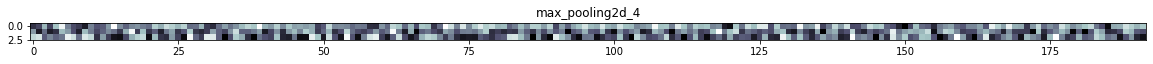

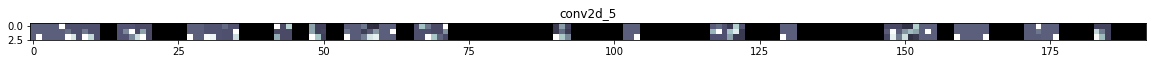

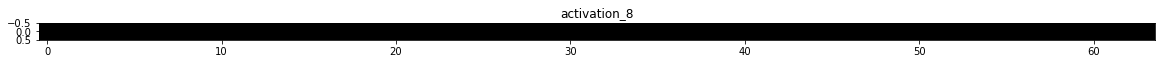

In [220]:


# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

img_path='../Handwritten_Digit_Recognition/img/seven.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(28, 28))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
# np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
# Rescale by 1/255
x /= 255.0
print('OUTPUT',layer.output)
print(x.shape)
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i] #
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='bone' )

In [224]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)
    # retrieve weights from the second hidden layer
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

conv2d_3 (3, 3, 1, 64)
conv2d_4 (3, 3, 64, 64)
conv2d_5 (3, 3, 64, 64)


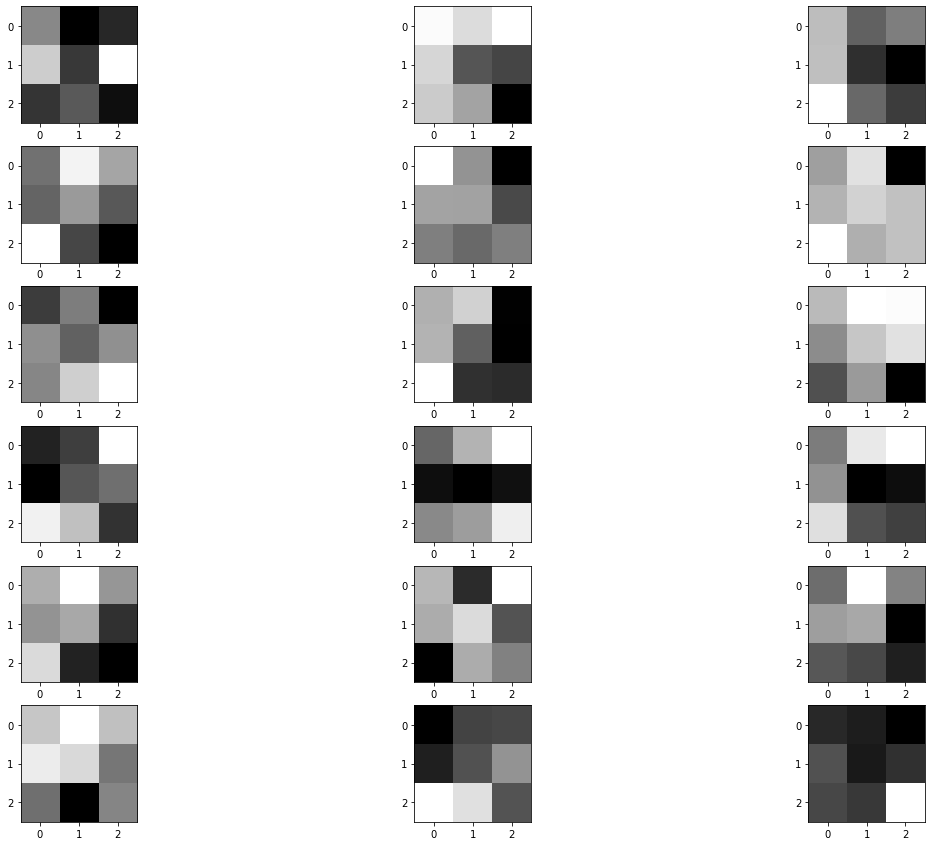

In [228]:
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
pyplot.show()

In [226]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d_3 (None, 26, 26, 64)
3 conv2d_4 (None, 11, 11, 64)
6 conv2d_5 (None, 3, 3, 64)
